# **Multi-Class Logistic Regression**

## Data & Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


* Weight : Balığın gram cinsinden ağırlığı
* Length1 : cm cinsinden dikey uzunluk
* Length2 : cm cinsinden diyagonal uzunluk
* Length3 : cm cinsinden çapraz uzunluk
* Height : cm cinsinden yükseklik
* Width : cm cinsinden diyagonal genişlik

---
---
## Eda ve Görsel

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

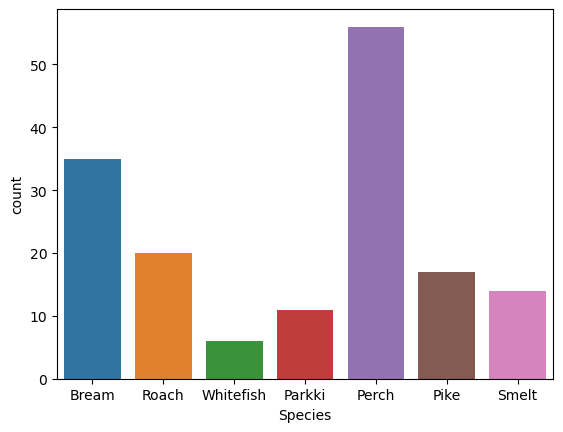

In [6]:
sns.countplot(x = df["Species"]);

<AxesSubplot:xlabel='Weight', ylabel='Height'>

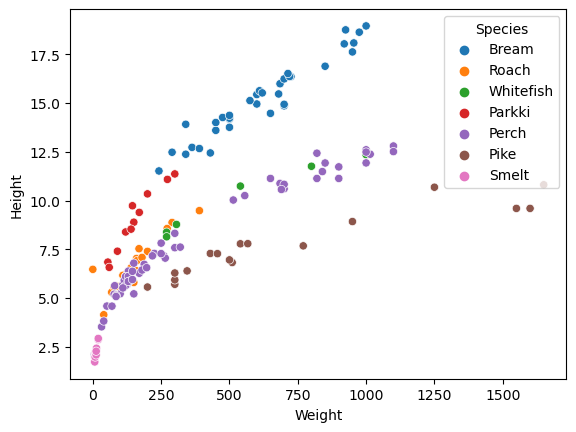

In [7]:
sns.scatterplot(x="Weight", y="Height",data=df, hue="Species")

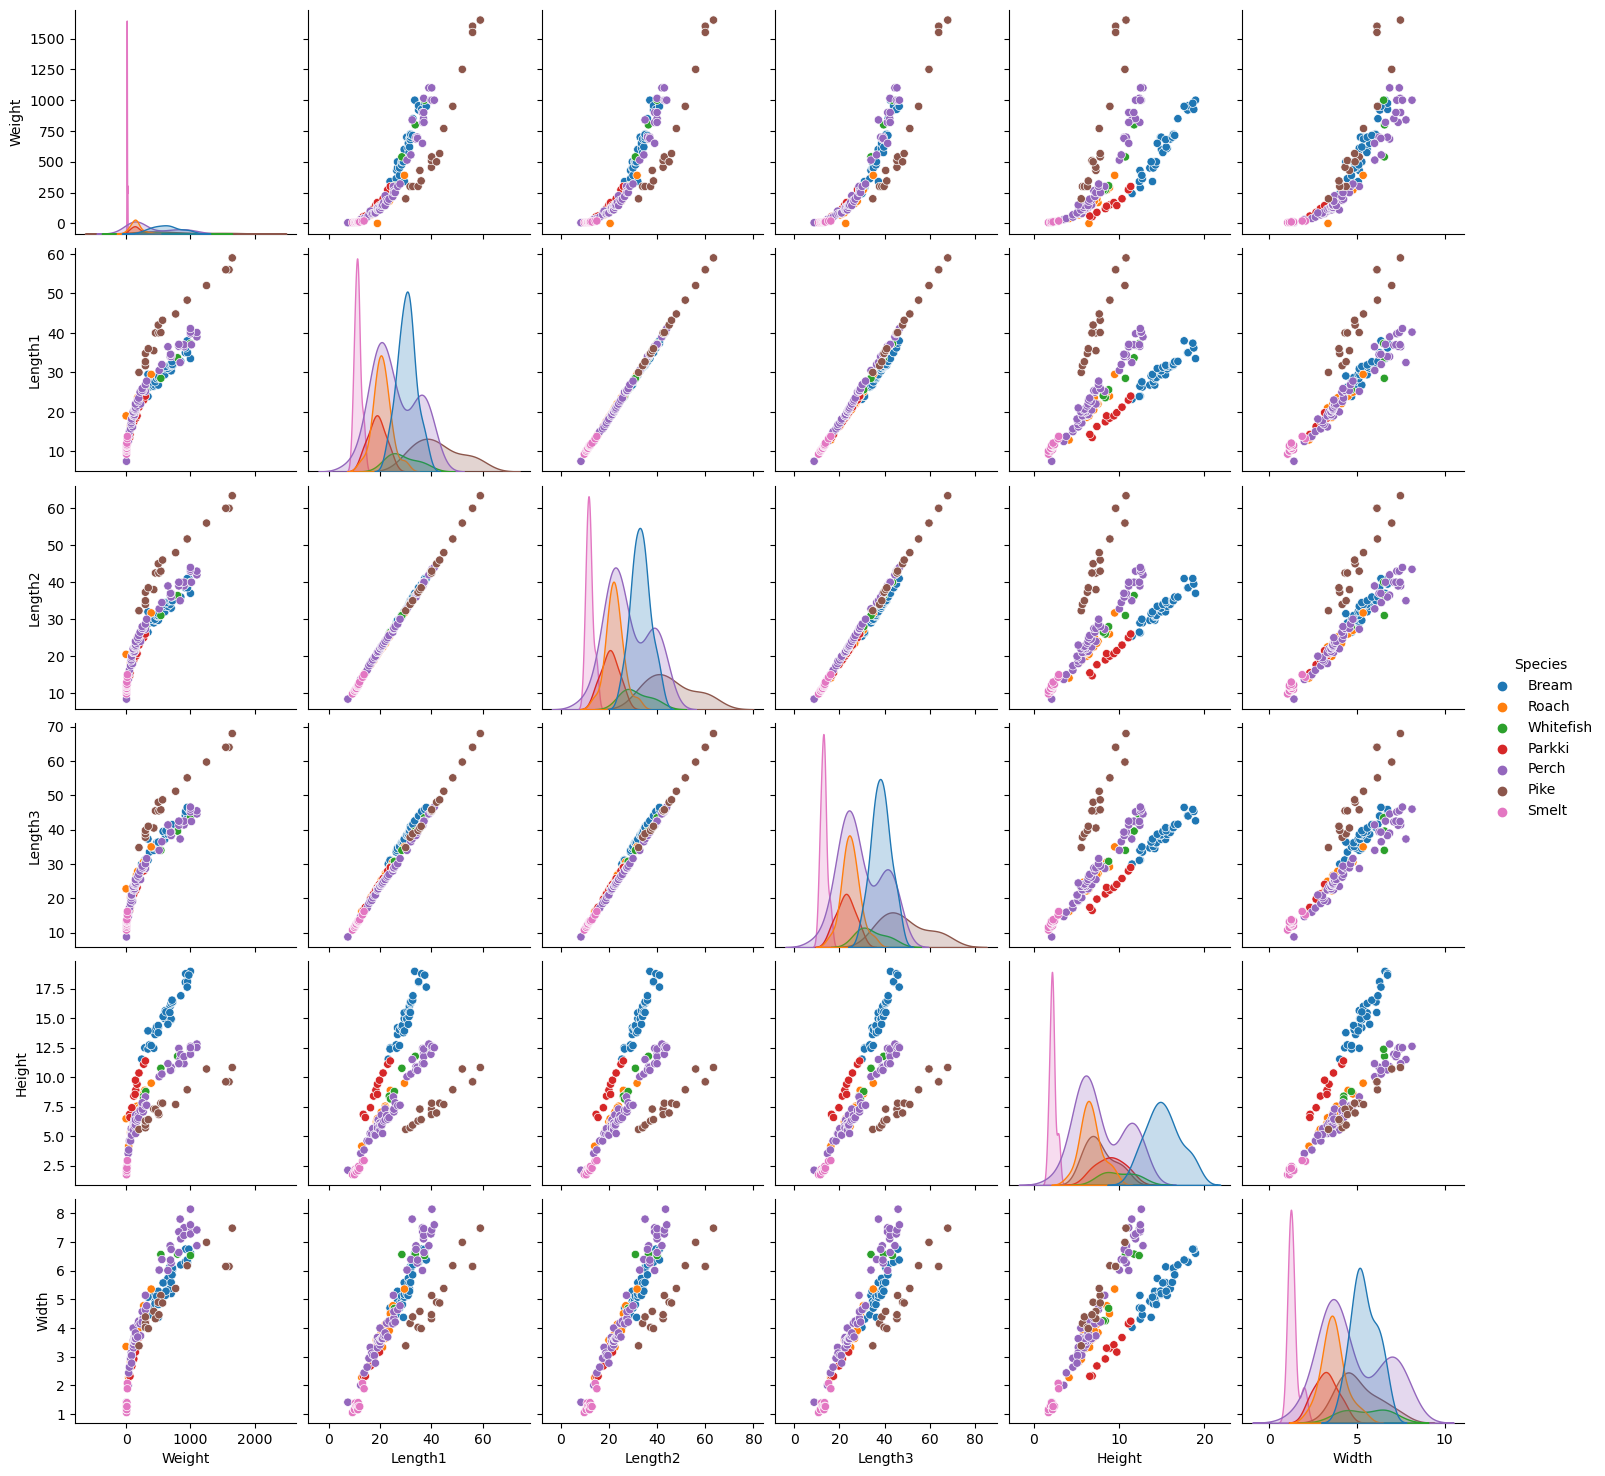

In [8]:
sns.pairplot(df,hue="Species")

<AxesSubplot:>

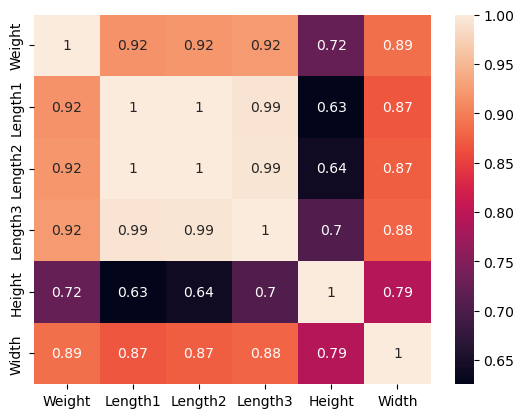

In [9]:
sns.heatmap(df.corr(), annot=True)

---
---
## Train Test Split

In [10]:
X = df.drop('Species',axis=1)
y = df['Species']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=9)

In [13]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

---
---
## Multi Class Log-Regr Model


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [15]:
log_model = LogisticRegression(solver="saga",multi_class="ovr",max_iter=5000)

In [16]:
penalty = ["l1","l2"]

C = np.logspace(0,5,16)

In [17]:
C

array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05])

In [18]:
grid_model = GridSearchCV(
    log_model,
    param_grid={
        "C":C,
        "penalty":penalty
    }
)

In [19]:
grid_model.fit(scaled_X_train,y_train)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarnin

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [20]:
grid_model.best_params_

{'C': 10.0, 'penalty': 'l1'}

In [22]:
grid_model.best_estimator_

LogisticRegression(C=10.0, max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [23]:
grid_model.best_estimator_.coef_

array([[ -2.72571233,   0.        ,   0.        ,   0.        ,
         11.21756921,  -1.20551998],
       [ -7.15178453,   0.        ,   0.        , -11.2289957 ,
         11.35442859,   0.        ],
       [ -1.5942193 ,   4.9277431 ,  28.69787359, -37.33391687,
         -0.57742651,   5.29576106],
       [ -0.60602781,   2.48679379,   2.12639432,   3.98017039,
         -5.32155873,  -2.35645162],
       [-10.44900488,   0.        , -21.29804529,  21.33359668,
         -1.80953099,   5.82242797],
       [  0.        ,   2.31384867,   0.        ,   0.88835588,
         -5.27521334,  -6.09955832],
       [ -2.42909012,  -0.73363452,   0.        ,   0.        ,
          0.        ,   3.43220401]])

---
---
## Model Performansı

In [29]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [22]:
fish_pred = grid_model.predict(scaled_X_test)

In [23]:
accuracy_score(y_test, fish_pred)

0.9375

In [24]:
confusion_matrix(y_test, fish_pred)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  1,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  2,  0,  0,  0,  0]], dtype=int64)

<Figure size 864x864 with 0 Axes>

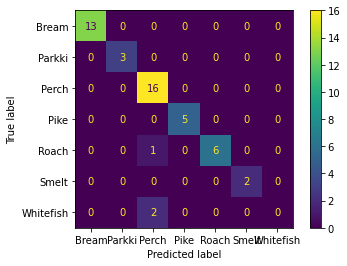

In [27]:
plt.figure(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)

<Figure size 864x864 with 0 Axes>

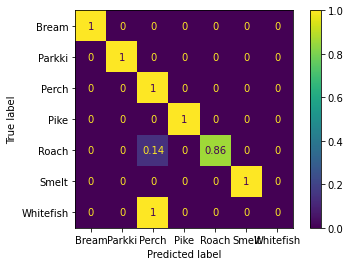

In [28]:
plt.figure(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test, normalize="true")

In [43]:
print(classification_report(y_test, fish_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        13
      Parkki       1.00      1.00      1.00         3
       Perch       0.84      1.00      0.91        16
        Pike       1.00      1.00      1.00         5
       Roach       1.00      0.86      0.92         7
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.83      0.84      0.83        48
weighted avg       0.91      0.94      0.92        48



c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

###Değerlendirme Eğrisi ve AUC

In [44]:
from sklearn.metrics import auc, roc_curve

In [45]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

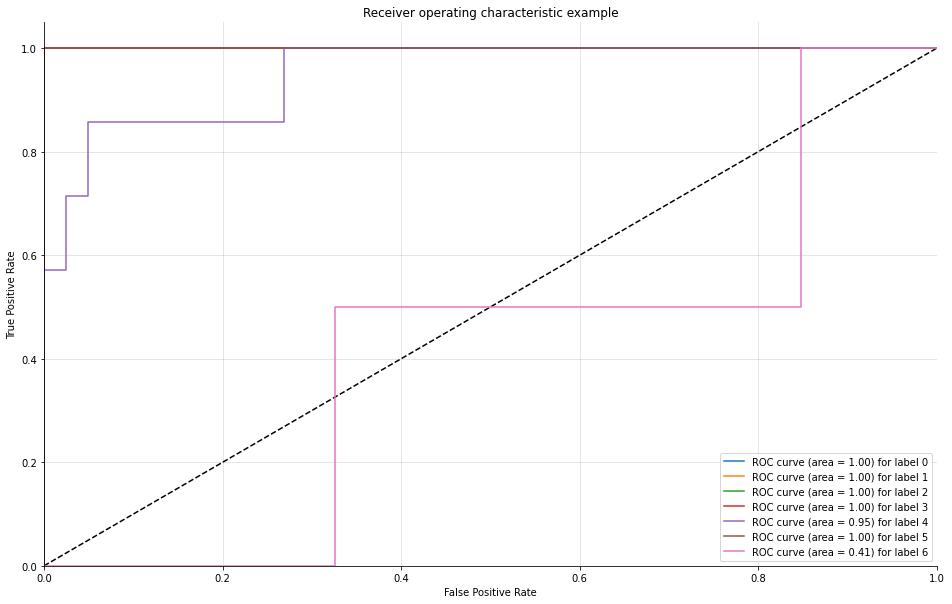

In [48]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=7, figsize=(16, 10))

---
---
# **"Bir adama balık ver, bir gün karnı doysun. Adama balıkları makine öğrenmesi ile sınıflandırmayı öğret, yol + yemek + sigorta + asgari ücretle iş bulsun"**